### Analysis of Query Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat
from scipy import stats
import re
import textstat as ts

In [2]:
openCloseData = pd.read_csv('openCloseData-34col.csv')
print(openCloseData.shape)

(159996, 35)


In [3]:
openCloseData.columns

Index(['Unnamed: 0', 'PostId', 'UserId', 'Comment', 'Body', 'Title', 'Tags',
       'Reputation', 'experienceInTime', 'WebsiteUrl', 'Location', 'AboutMe',
       'Views', 'Upvotes', 'Downvotes', 'ProfileImageUrl', 'tagCount',
       'closed', 'lowerUpperRatio', 'sentenceCount', 'firstLineLength',
       'codeLength', 'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'websiteUrlFilled', 'locationFilled',
       'aboutMeFilled', 'profileImageUrlFilled'],
      dtype='object')

In [4]:
openCloseData.replace(np.nan,0,inplace=True)  #replacing NaN to 0
openCloseData.lowerUpperRatio.replace(np.inf,0,inplace=True)  #replacing infinity to 0

In [10]:
openData = openCloseData[openCloseData['closed'] == 0]
closeData = openCloseData[openCloseData['closed'] == 1]
print((openData.shape, closeData.shape))

((80000, 35), (79996, 35))


In [18]:
openData = openData.drop_duplicates(subset =['PostId', 'UserId', 'Comment', 'Body', 'Title', 'Tags',
       'Reputation', 'experienceInTime', 'WebsiteUrl', 'Location', 'AboutMe',
       'Views', 'Upvotes', 'Downvotes', 'ProfileImageUrl', 'tagCount',
       'closed', 'lowerUpperRatio', 'sentenceCount', 'firstLineLength',
       'codeLength', 'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'websiteUrlFilled', 'locationFilled',
       'aboutMeFilled', 'profileImageUrlFilled'])
closeData = closeData.drop_duplicates(subset =['PostId', 'UserId', 'Comment', 'Body', 'Title', 'Tags',
       'Reputation', 'experienceInTime', 'WebsiteUrl', 'Location', 'AboutMe',
       'Views', 'Upvotes', 'Downvotes', 'ProfileImageUrl', 'tagCount',
       'closed', 'lowerUpperRatio', 'sentenceCount', 'firstLineLength',
       'codeLength', 'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'websiteUrlFilled', 'locationFilled',
       'aboutMeFilled', 'profileImageUrlFilled'])

In [20]:
print((openData.shape, closeData.shape))

((79385, 35), (79945, 35))


### 1. Lower to Upper Ratio

In [21]:
max_low_up_ratio_o = np.max(openData['lowerUpperRatio'])
min_low_up_ratio_o = np.min(openData['lowerUpperRatio'])
avg_low_up_ratio_o = np.mean(openData['lowerUpperRatio'])
max_low_up_ratio_c = np.max(closeData['lowerUpperRatio'])
min_low_up_ratio_c = np.min(closeData['lowerUpperRatio'])
avg_low_up_ratio_c = np.mean(closeData['lowerUpperRatio'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_low_up_ratio_o) + '\t\t' + str(max_low_up_ratio_c))
print('Minimum\t\t' + str(min_low_up_ratio_o) + '\t\t' + str(min_low_up_ratio_c))
print('Average\t\t' + str(avg_low_up_ratio_o) + '\t' + str(avg_low_up_ratio_c))
print('Mode\t\t' + str(stat.mode(openData['lowerUpperRatio'])) + '\t\t' + str(stat.mode(closeData['lowerUpperRatio'])))
print('Median\t\t' + str(stat.median(openData['lowerUpperRatio'])) + '\t\t' + str(stat.median(closeData['lowerUpperRatio'])))

Value		Open		Close
Maximum		1740.6		1453.0
Minimum		0.0		0.0
Average		25.112847749754984	31.489016993511065
Mode		21.0		0.0
Median		18.93103448		24.11111111


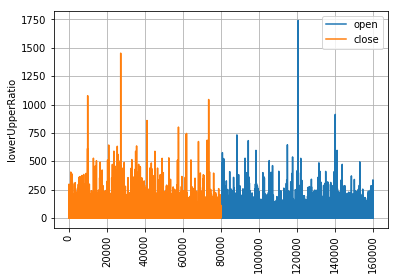

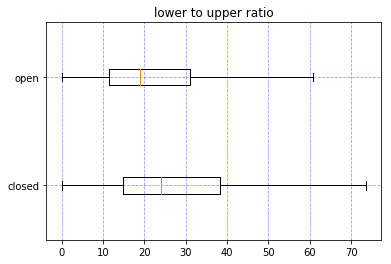

In [22]:
plt.figure()
plt.plot(openData['lowerUpperRatio'], label = 'open')
plt.plot(closeData['lowerUpperRatio'], label = 'close')
plt.xticks(rotation='vertical')
plt.ylabel('lowerUpperRatio')
plt.legend()
plt.grid(True)
plt.show()

fig, ax = plt.subplots()
data = [closeData['lowerUpperRatio'],openData['lowerUpperRatio']]
ax.set_title('lower to upper ratio')
plt.boxplot(data, showfliers=False, labels=['closed', 'open'], vert=False)
plt.grid(True, linestyle='--', color='b', alpha=0.4)
plt.show()

				No. of Questions vs Ratio of Lowercase and Uppercase letters



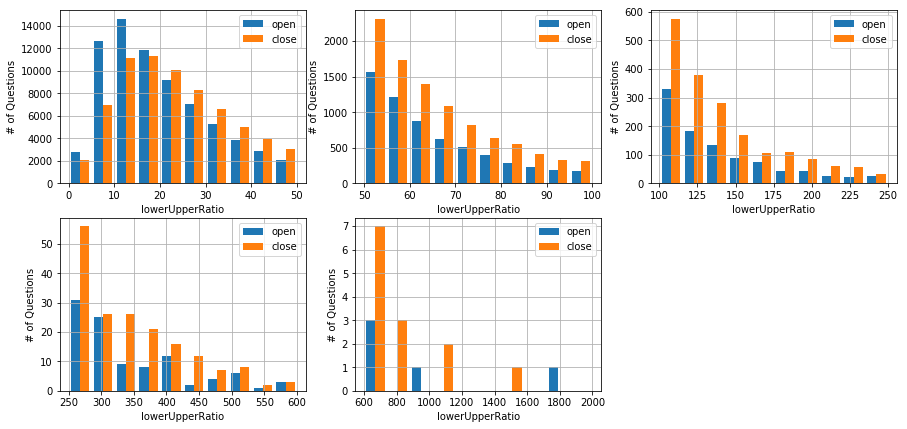

In [23]:
def hist_plot_range(min_value, max_value, col):
    """ To plot histogram using the 'col' field of Dataset for the values in the range 'min_value' - 'max_value' """
    plt.hist([openData[col],closeData[col]], range=(min_value, max_value), label = ['open', 'close'])
    plt.xlabel(col)
    plt.ylabel('# of Questions')
    plt.grid(True)
    plt.legend()
  
print('\t\t\t\tNo. of Questions vs Ratio of Lowercase and Uppercase letters\n')

plt.figure(figsize = (15,7))
range_list = [(0,50),(50,100),(100,250),(250,600),(600,2000)]

for i in range(5):
    plt.subplot(2, 3, i+1)
    min_val, max_val = range_list[i]
    hist_plot_range(min_val, max_val, 'lowerUpperRatio')
    
plt.show()

# No. of close Questions < open Questions when ratio is less than 20.

### 2. Sentence Count

In [24]:
max_sen_o = np.max(openData['sentenceCount'])
min_sen_o = np.min(openData['sentenceCount'])
avg_sen_o = np.mean(openData['sentenceCount'])
max_sen_c = np.max(closeData['sentenceCount'])
min_sen_c = np.min(closeData['sentenceCount'])
avg_sen_c = np.mean(closeData['sentenceCount'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_sen_o) + '\t\t' + str(max_sen_c))
print('Minimum\t\t' + str(min_sen_o) + '\t\t' + str(min_sen_c))
print('Average\t\t' + str(avg_sen_o) + '\t' + str(avg_sen_c))
print('Mode\t\t' + str(stat.mode(openData['sentenceCount'])) + '\t\t' + str(stat.mode(closeData['sentenceCount'])))
print('Median\t\t' + str(stat.median(openData['sentenceCount'])) + '\t\t' + str(stat.median(closeData['sentenceCount'])))

Value		Open		Close
Maximum		2039		5579
Minimum		0		0
Average		21.460023933992566	9.87330039402089
Mode		4		3
Median		10		6


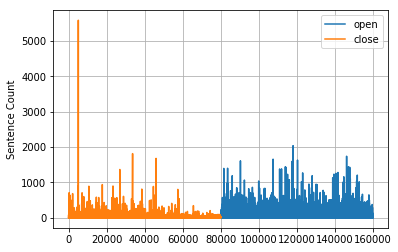

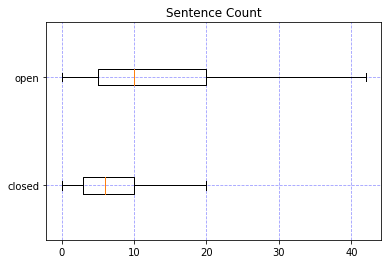

In [25]:
plt.figure()
plt.plot(openData['sentenceCount'], label = 'open')
plt.plot(closeData['sentenceCount'], label = 'close')
plt.ylabel('Sentence Count')
plt.grid(True)
plt.legend()
plt.show()

fig1, ax1 = plt.subplots()
data = [closeData['sentenceCount'],openData['sentenceCount']]
ax1.set_title('Sentence Count')
plt.boxplot(data, showfliers=False, labels=['closed', 'open'], vert=False)
plt.grid(True, linestyle='--', color='b', alpha=0.4)
plt.show()

37413
58440


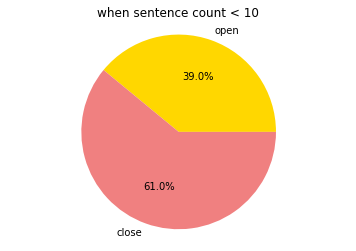

38709
18748


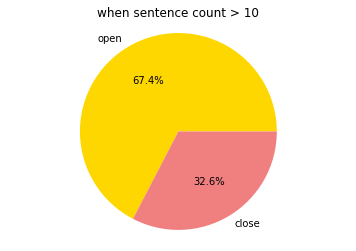

In [26]:
less_sencount = 0

#def sen_count_thresh(row):
#    if row < 10:
#        less_sencount = less_sencount + 1
    
#less_sencount_o = 0
#openData['sentenceCount'].apply(sen_count_thresh)
#print(less_sencount)

#less_sencount_c = 0
#less_sencount_c = less_sencount_c + closeData['sentenceCount'].apply(sen_count_thresh)

#print(less_sencount_o, less_sencount_c)

sen_count_o_lt10 = openData[openData.sentenceCount < 10]
print(sen_count_o_lt10.shape[0])

sen_count_c_lt10 = closeData[closeData.sentenceCount < 10]
print(sen_count_c_lt10.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [sen_count_o_lt10.shape[0], sen_count_c_lt10.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('when sentence count < 10')
plt.axis('equal')
plt.show()

#help(plt.pie)

sen_count_o_gt10 = openData[openData.sentenceCount > 10]
print(sen_count_o_gt10.shape[0])

sen_count_c_gt10 = closeData[closeData.sentenceCount > 10]
print(sen_count_c_gt10.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [sen_count_o_gt10.shape[0], sen_count_c_gt10.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('when sentence count > 10')
plt.axis('equal')
plt.show()

/home/ashita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(79460, 2)


/home/ashita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


(78335, 2)


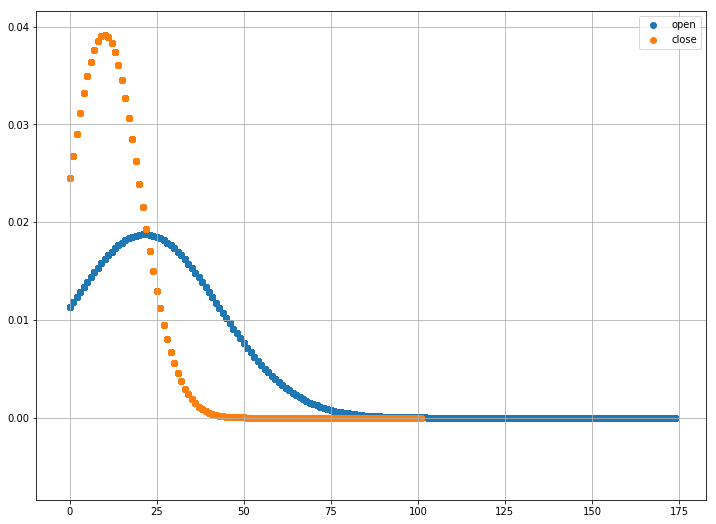

In [27]:
sen_count_c_df = closeData[['sentenceCount']]
sen_count_c_df['zscore'] = np.abs(stats.zscore(sen_count_c_df['sentenceCount']))
#x_close.head()
sen_count_c_df = sen_count_c_df[(sen_count_c_df.zscore < 3)]
print(sen_count_c_df.shape)

sen_count_c = sen_count_c_df['sentenceCount']
dist_sen_c = stats.norm.pdf(sen_count_c, avg_sen_c, np.std(sen_count_c))


sen_count_o_df = openData[['sentenceCount']]
sen_count_o_df['zscore'] = np.abs(stats.zscore(sen_count_o_df['sentenceCount']))
#sen_count_o_df.head()
sen_count_o_df = sen_count_o_df[(sen_count_o_df.zscore<3)]
print(sen_count_o_df.shape)

sen_count_o = sen_count_o_df['sentenceCount']
dist_sen_o = stats.norm.pdf(sen_count_o, avg_sen_o, np.std(sen_count_o))

plt.figure(figsize=(12,9))

plt.scatter(sen_count_o, dist_sen_o, label='open')
plt.scatter(sen_count_c, dist_sen_c, label='close')

plt.legend()
plt.grid(True)

plt.show()

						No. of Questions vs Sentence Count



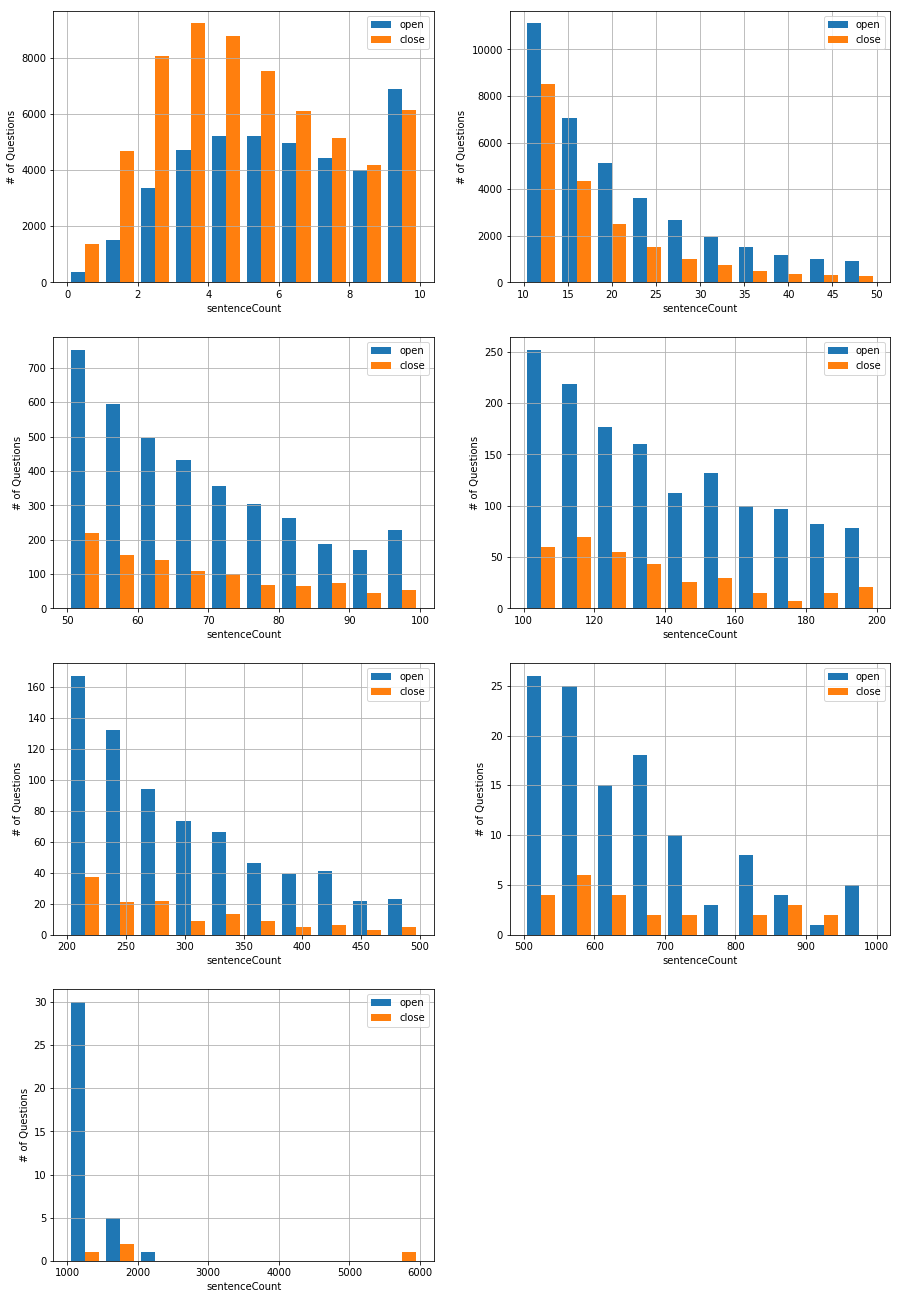

In [28]:
print('\t\t\t\t\t\tNo. of Questions vs Sentence Count\n')

plt.figure(figsize = (15,23))
range_list = [(0, 10),(10,50),(50,100),(100,200),(200, 500),(500,1000),(1000,6000)]

for i in range(7):
    plt.subplot(4, 2, i+1)
    min_val, max_val = range_list[i]
    hist_plot_range(min_val, max_val, 'sentenceCount')
    
plt.show()

# No. of Closed Questions > Open Questions when sentence count <= 9

### 3. First Line Length

In [29]:
max_fll_o = np.max(openData['firstLineLength'])
min_fll_o = np.min(openData['firstLineLength'])
avg_fll_o = np.mean(openData['firstLineLength'])
max_fll_c = np.max(closeData['firstLineLength'])
min_fll_c = np.min(closeData['firstLineLength'])
avg_fll_c = np.mean(closeData['firstLineLength'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_fll_o) + '\t\t' + str(max_fll_c))
print('Minimum\t\t' + str(min_fll_o) + '\t\t' + str(min_fll_c))
print('Average\t\t' + str(avg_fll_o) + '\t' + str(avg_fll_c))
print('Mode\t\t' + str(stat.mode(openData['firstLineLength'])) + '\t\t' + str(stat.mode(closeData['firstLineLength'])))
print('Median\t\t' + str(stat.median(openData['firstLineLength'])) + '\t\t' + str(stat.median(closeData['firstLineLength'])))

Value		Open		Close
Maximum		20453		21335
Minimum		0		0
Average		110.06991245197456	109.18195009068735
Mode		65		0
Median		84		85


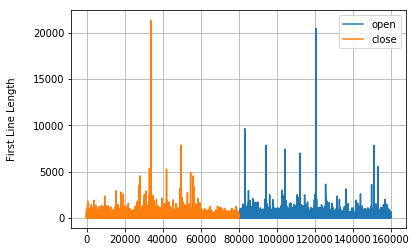

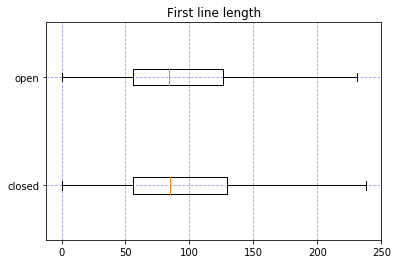

In [31]:
plt.figure()

plt.plot(openData['firstLineLength'], label = 'open')
plt.plot(closeData['firstLineLength'], label = 'close')
plt.ylabel('First Line Length\n')
plt.legend()
plt.grid(True)

plt.show()



fig, ax = plt.subplots()
data = [closeData['firstLineLength'],openData['firstLineLength']]
ax.set_title('First line length')
plt.boxplot(data, showfliers=False, labels=['closed', 'open'], vert=False)
plt.grid(True, linestyle='--', color='b', alpha=0.4)
plt.show()

					No. of Questions vs Length of first line



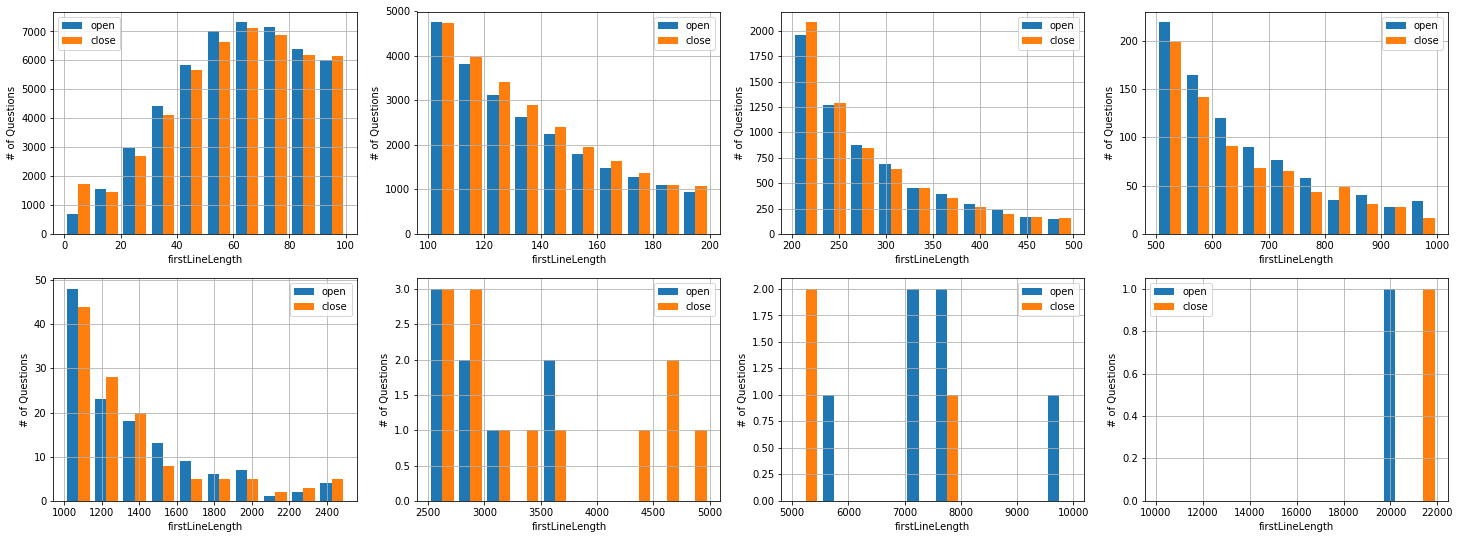

In [32]:
print('\t\t\t\t\tNo. of Questions vs Length of first line\n')

plt.figure(figsize = (25,9))
range_list = [(0,100),(100,200),(200,500),(500,1000),(1000,2500),(2500,5000),(5000,10000),(10000,22000)]

for i in range(8):
    plt.subplot(2, 4, i+1)
    min_val, max_val = range_list[i]
    hist_plot_range(min_val, max_val, 'firstLineLength')
    
plt.show()

### 4. Code Length

In [33]:
max_code_len_o = np.max(openData['codeLength'])
min_code_len_o = np.min(openData['codeLength'])
avg_code_len_o = np.mean(openData['codeLength'])
max_code_len_c = np.max(closeData['codeLength'])
min_code_len_c = np.min(closeData['codeLength'])
avg_code_len_c = np.mean(closeData['codeLength'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_code_len_o) + '\t\t' + str(max_code_len_c))
print('Minimum\t\t' + str(min_code_len_o) + '\t\t' + str(min_code_len_c))
print('Average\t\t' + str(avg_code_len_o) + '\t' + str(avg_code_len_c))
print('Mode\t\t' + str(stat.mode(openData['codeLength'])) + '\t\t' + str(stat.mode(closeData['codeLength'])))
print('Median\t\t' + str(stat.median(openData['codeLength'])) + '\t\t' + str(stat.median(closeData['codeLength'])))

Value		Open		Close
Maximum		29331		30890
Minimum		0		0
Average		777.5308181646407	359.1163299768591
Mode		0		0
Median		308		5


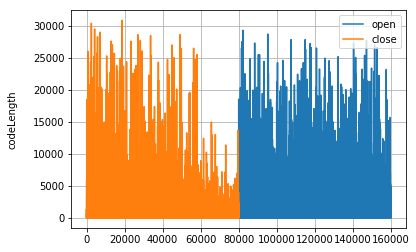

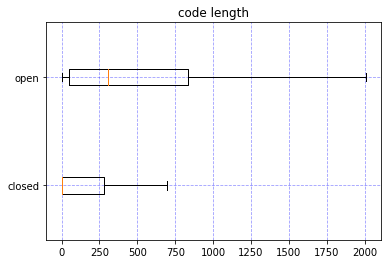

In [34]:
plt.figure()

plt.plot(openData['codeLength'], label = 'open')
plt.plot(closeData['codeLength'], label = 'close')
plt.ylabel('codeLength\n')
plt.legend()
plt.grid(True)

plt.show()



fig, ax = plt.subplots()
data = [closeData['codeLength'],openData['codeLength']]
ax.set_title('code length')
plt.boxplot(data, showfliers=False, labels=['closed', 'open'], vert=False)
plt.grid(True, linestyle='--', color='b', alpha=0.4)
plt.show()

57517
70736


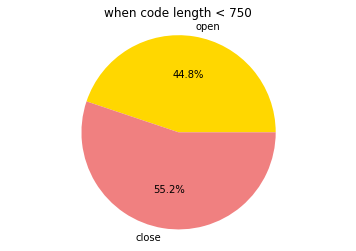

21838
9200


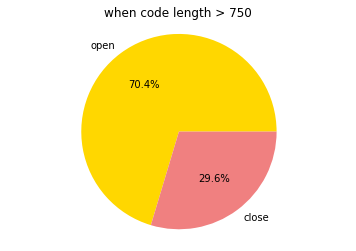

In [35]:
code_len_o_lt750 = openData[openData.codeLength < 750]
print(code_len_o_lt750.shape[0])

code_len_c_lt750 = closeData[closeData.codeLength < 750]
print(code_len_c_lt750.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [code_len_o_lt750.shape[0], code_len_c_lt750.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('when code length < 750')
plt.axis('equal')
plt.show()

#help(plt.pie)

code_len_o_gt750 = openData[openData.codeLength > 750]
print(code_len_o_gt750.shape[0])

code_len_c_gt750 = closeData[closeData.codeLength > 750]
print(code_len_c_gt750.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [code_len_o_gt750.shape[0], code_len_c_gt750.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('when code length > 750')
plt.axis('equal')
plt.show()

In [36]:
#code_close = closeData[['codeLength']]
#code_close['zscore'] = np.abs(stats.zscore(code_close['codeLength']))
##x_close.head()
#code_close = code_close[(code_close.zscore < 3)]
#print(code_close.shape)

#code_len_c = code_close['codeLength']
#std_c = np.std(code_len_c)
#dist_code_c = stats.norm.pdf(code_len_c, avg_code_len_c, std_c)


#code_open = openData[['codeLength']]
#code_open['zscore'] = np.abs(stats.zscore(code_open['codeLength']))
#code_open.head()
#code_open = code_open[(code_open.zscore < 3)]
#print(code_open.shape)

#code_len_o = code_open['codeLength']
#std_o = np.std(code_len_o)
#dist_code_o = stats.norm.pdf(code_len_o, avg_code_len_o, std_o)

#plt.figure(figsize=(12,9))

#plt.plot(code_len_o, dist_code_o, label='open')
#plt.scatter(code_len_c, dist_code_c, label='close')

#plt.legend()
#plt.grid(True)

#plt.show()

In [37]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    A scatter plot of *y* vs *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        The data positions.
    
    s : scalar or array_like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        The marker color. Possible values:
    
        - A single color format string.
        - A sequence of color specifications of length n.
        - A sequence of n numbers to be mapped to colors using *cmap* and
          *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
    
        Note that *c* should not be a single numeric RGB or RGBA seque

### 5. URL Count

In [38]:
max_url_o = np.max(openData['urlCount'])
min_url_o = np.min(openData['urlCount'])
avg_url_o = np.mean(openData['urlCount'])
max_url_c = np.max(closeData['urlCount'])
min_url_c = np.min(closeData['urlCount'])
avg_url_c = np.mean(closeData['urlCount'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_url_o) + '\t\t' + str(max_url_c))
print('Minimum\t\t' + str(min_url_o) + '\t\t' + str(min_url_c))
print('Average\t\t' + str(avg_url_o) + '\t' + str(avg_url_c))
print('Mode\t\t' + str(stat.mode(openData['urlCount'])) + '\t\t' + str(stat.mode(closeData['urlCount'])))
print('Median\t\t' + str(stat.median(openData['urlCount'])) + '\t\t' + str(stat.median(closeData['urlCount'])))

Value		Open		Close
Maximum		181		60
Minimum		0		0
Average		0.17418907854128612	0.2096441303396085
Mode		0		0
Median		0		0


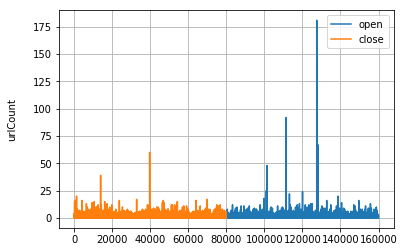

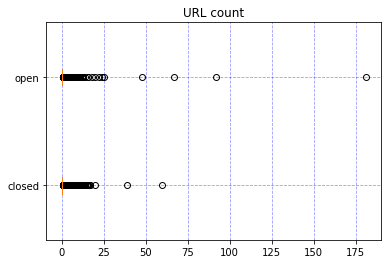

In [39]:
plt.figure()

plt.plot(openData['urlCount'], label = 'open')
plt.plot(closeData['urlCount'], label = 'close')
plt.ylabel('urlCount\n')
plt.legend()
plt.grid(True)

plt.show()



fig, ax = plt.subplots()
data = [closeData['urlCount'],openData['urlCount']]
ax.set_title('URL count')
plt.boxplot(data, showfliers=True, labels=['closed', 'open'], vert=False)
plt.grid(True, linestyle='--', color='b', alpha=0.4)
plt.show()

6961
8675


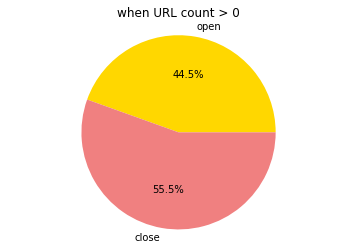

72424
71270


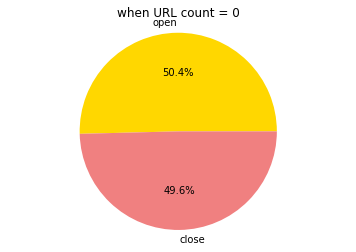

In [40]:
URLcount_o_gt = openData[openData.urlCount > 0]
print(URLcount_o_gt.shape[0])

URLcount_c_gt = closeData[closeData.urlCount > 0]
print(URLcount_c_gt.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [URLcount_o_gt.shape[0], URLcount_c_gt.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('when URL count > 0')
plt.axis('equal')
plt.show()

#------------

URLcount_o_eq = openData[openData.urlCount == 0]
print(URLcount_o_eq.shape[0])

URLcount_c_eq = closeData[closeData.urlCount == 0]
print(URLcount_c_eq.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [URLcount_o_eq.shape[0], URLcount_c_eq.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('when URL count = 0')
plt.axis('equal')
plt.show()

### 6. # SO URLs

In [41]:
max_so_url_o = np.max(openData['SOUrlCount'])
min_so_url_o = np.min(openData['SOUrlCount'])
avg_so_url_o = np.mean(openData['SOUrlCount'])
max_so_url_c = np.max(closeData['SOUrlCount'])
min_so_url_c = np.min(closeData['SOUrlCount'])
avg_so_url_c = np.mean(closeData['SOUrlCount'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_so_url_o) + '\t\t' + str(max_so_url_c))
print('Minimum\t\t' + str(min_so_url_o) + '\t\t' + str(min_so_url_c))
print('Average\t\t' + str(avg_so_url_o) + '\t' + str(avg_so_url_c))
print('Mode\t\t' + str(stat.mode(openData['SOUrlCount'])) + '\t\t' + str(stat.mode(closeData['SOUrlCount'])))
print('Median\t\t' + str(stat.median(openData['SOUrlCount'])) + '\t\t' + str(stat.median(closeData['SOUrlCount'])))

# Questions having more than 4 SO URL are closed

Value		Open		Close
Maximum		4		13
Minimum		0		0
Average		0.0014738300686527681	0.02940771780599162
Mode		0		0
Median		0		0


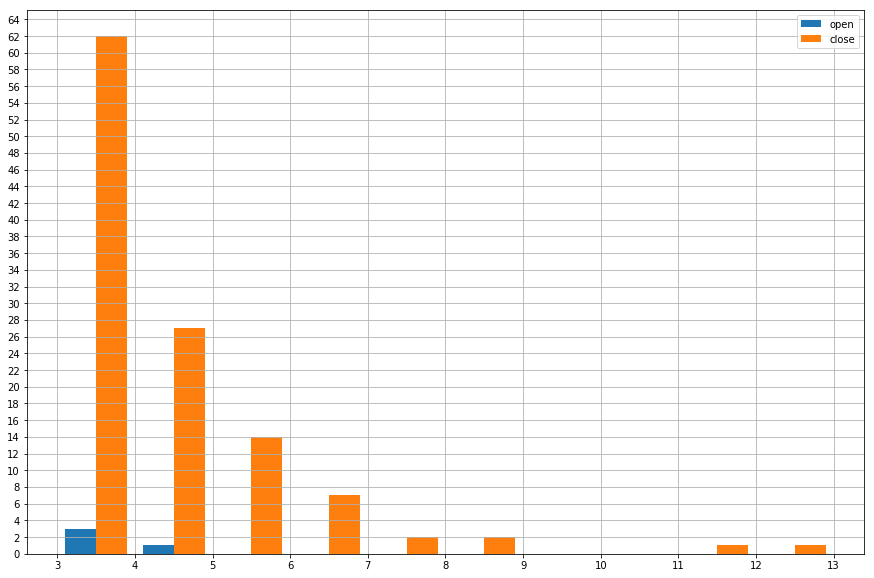

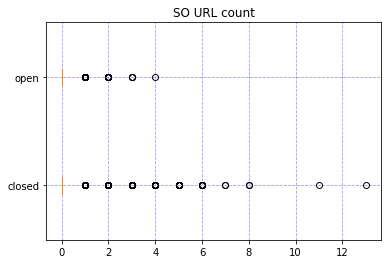

In [42]:
plt.figure(figsize=(15,10))
plt.hist([openData['SOUrlCount'], closeData['SOUrlCount']], range = (3,13), label = ['open', 'close'])
plt.legend()
plt.xticks(range(3,14))
plt.yticks(range(0,65,2))
plt.grid(True)




fig, ax = plt.subplots()
data = [closeData['SOUrlCount'],openData['SOUrlCount']]
ax.set_title('SO URL count')
plt.boxplot(data, showfliers=True, labels=['closed', 'open'], vert=False)
plt.grid(True, linestyle='--', color='b', alpha=0.4)
plt.show()
# Questions having SO URL are more likely to be closed 

79285
78204


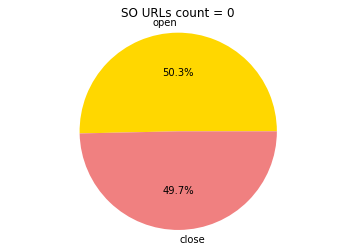

100
1714


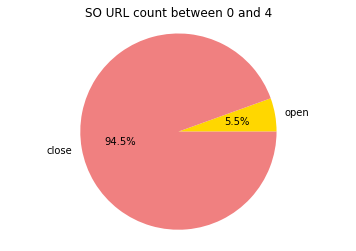

0
27


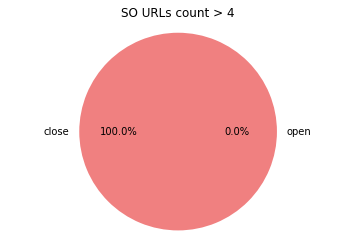

In [43]:
SOURL_count_o_gt = openData[openData.SOUrlCount == 0]
print(SOURL_count_o_gt.shape[0])

SOURL_count_c_gt = closeData[closeData.SOUrlCount == 0]
print(SOURL_count_c_gt.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [SOURL_count_o_gt.shape[0], SOURL_count_c_gt.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('SO URLs count = 0')
plt.axis('equal')
plt.show()

#--------------------

SOURL_count_o_bet0and4 = openData[(openData.SOUrlCount > 0) & (openData.SOUrlCount <= 4)]
print(SOURL_count_o_bet0and4.shape[0])

SOURL_count_c_bet0and4 = closeData[(closeData.SOUrlCount > 0) & (closeData.SOUrlCount <= 4)]
print(SOURL_count_c_bet0and4.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [SOURL_count_o_bet0and4.shape[0], SOURL_count_c_bet0and4.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('SO URL count between 0 and 4')
plt.axis('equal')
plt.show()

#-----------------

SOURL_count_o_gt4 = openData[openData.SOUrlCount > 4]
print(SOURL_count_o_gt4.shape[0])

SOURL_count_c_gt4 = closeData[closeData.SOUrlCount > 4]
print(SOURL_count_c_gt4.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [SOURL_count_o_gt4.shape[0], SOURL_count_c_gt4.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('SO URLs count > 4')
plt.axis('equal')
plt.show()

### 6. # Sentences starting with I

In [44]:
max_start_i_o = np.max(openData['sentencesStartWithICount'])
min_start_i_o = np.min(openData['sentencesStartWithICount'])
avg_start_i_o = np.mean(openData['sentencesStartWithICount'])
max_start_i_c = np.max(closeData['sentencesStartWithICount'])
min_start_i_c = np.min(closeData['sentencesStartWithICount'])
avg_start_i_c = np.mean(closeData['sentencesStartWithICount'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_start_i_o) + '\t\t' + str(max_start_i_c))
print('Minimum\t\t' + str(min_start_i_o) + '\t\t' + str(min_start_i_c))
print('Average\t\t' + str(avg_start_i_o) + '\t' + str(avg_start_i_c))
print('Mode\t\t' + str(stat.mode(openData['sentencesStartWithICount'])) + '\t\t' + str(stat.mode(closeData['sentencesStartWithICount'])))
print('Median\t\t' + str(stat.median(openData['sentencesStartWithICount'])) + '\t\t' + str(stat.median(closeData['sentencesStartWithICount'])))

# Questions having more than 15 senetences starting with I are closed

Value		Open		Close
Maximum		15		22
Minimum		0		0
Average		1.5275807772249166	1.2850459691037588
Mode		1		1
Median		1		1


				No. of Questions vs Sentence Count starting with I



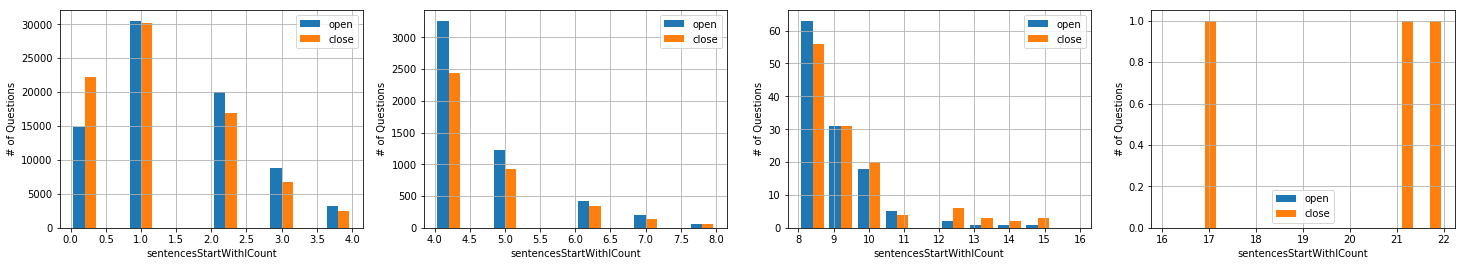

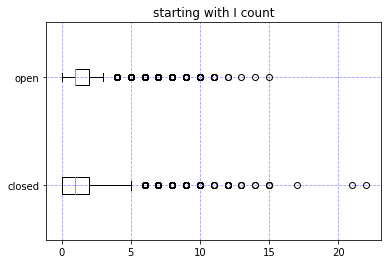

In [45]:
print('\t\t\t\tNo. of Questions vs Sentence Count starting with I\n')

plt.figure(figsize = (25,4))
range_list = [(0,4),(4,8),(8,16),(16,22)]

for i in range(4):
    plt.subplot(1, 4, i+1)
    min_val, max_val = range_list[i]
    hist_plot_range(min_val, max_val, 'sentencesStartWithICount')
    
plt.show()



fig, ax = plt.subplots()
data = [closeData['sentencesStartWithICount'],openData['sentencesStartWithICount']]
ax.set_title('starting with I count')
plt.boxplot(data, showfliers=True, labels=['closed', 'open'], vert=False)
plt.grid(True, linestyle='--', color='b', alpha=0.4)
plt.show()

### 7. # Sentences starting with You

In [46]:
max_start_u_o = np.max(openData['sentencesStartWithYouCount'])
min_start_u_o = np.min(openData['sentencesStartWithYouCount'])
avg_start_u_o = np.mean(openData['sentencesStartWithYouCount'])
max_start_u_c = np.max(closeData['sentencesStartWithYouCount'])
min_start_u_c = np.min(closeData['sentencesStartWithYouCount'])
avg_start_u_c = np.mean(closeData['sentencesStartWithYouCount'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_start_u_o) + '\t\t' + str(max_start_u_c))
print('Minimum\t\t' + str(min_start_u_o) + '\t\t' + str(min_start_u_c))
print('Average\t\t' + str(avg_start_u_o) + '\t' + str(avg_start_u_c))
print('Mode\t\t' + str(stat.mode(openData['sentencesStartWithYouCount'])) + '\t\t' + str(stat.mode(closeData['sentencesStartWithYouCount'])))
print('Median\t\t' + str(stat.median(openData['sentencesStartWithYouCount'])) + '\t\t' + str(stat.median(closeData['sentencesStartWithYouCount'])))

# Questions having sentences starting with You are likely to be closed

Value		Open		Close
Maximum		0		18
Minimum		0		0
Average		0.0	0.004015260491587967
Mode		0		0
Median		0		0


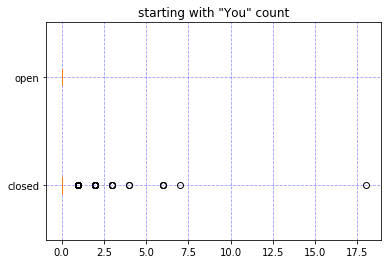

In [47]:

fig, ax = plt.subplots()
data = [closeData['sentencesStartWithYouCount'],openData['sentencesStartWithYouCount']]
ax.set_title('starting with "You" count')
plt.boxplot(data, showfliers=True, labels=['closed', 'open'], vert=False)
plt.grid(True, linestyle='--', color='b', alpha=0.4)
plt.show()

0
239


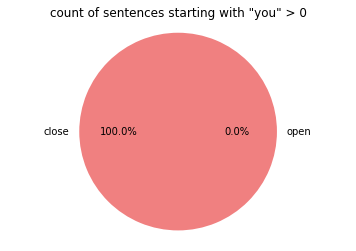

79385
79706


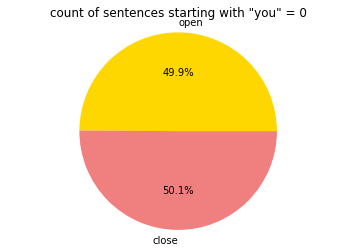

In [48]:
you_count_o_gt = openData[openData.sentencesStartWithYouCount > 0]
print(you_count_o_gt.shape[0])

you_count_c_gt = closeData[closeData.sentencesStartWithYouCount > 0]
print(you_count_c_gt.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [you_count_o_gt.shape[0], you_count_c_gt.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('count of sentences starting with "you" > 0')
plt.axis('equal')
plt.show()


#---------------

you_count_o_gt = openData[openData.sentencesStartWithYouCount == 0]
print(you_count_o_gt.shape[0])

you_count_c_gt = closeData[closeData.sentencesStartWithYouCount == 0]
print(you_count_c_gt.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [you_count_o_gt.shape[0], you_count_c_gt.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('count of sentences starting with "you" = 0')
plt.axis('equal')
plt.show()

### 8. # Characters in Title

In [49]:
max_title_len_o = np.max(openData['titleLengthInChars'])
min_title_len_o = np.min(openData['titleLengthInChars'])
avg_title_len_o = np.mean(openData['titleLengthInChars'])
max_title_len_c = np.max(closeData['titleLengthInChars'])
min_title_len_c = np.min(closeData['titleLengthInChars'])
avg_title_len_c = np.mean(closeData['titleLengthInChars'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_title_len_o) + '\t\t' + str(max_title_len_c))
print('Minimum\t\t' + str(min_title_len_o) + '\t\t' + str(min_title_len_c))
print('Average\t\t' + str(avg_title_len_o) + '\t' + str(avg_title_len_c))
print('Mode\t\t' + str(stat.mode(openData['titleLengthInChars'])) + '\t\t' + str(stat.mode(closeData['titleLengthInChars'])))
print('Median\t\t' + str(stat.median(openData['titleLengthInChars'])) + '\t\t' + str(stat.median(closeData['titleLengthInChars'])))

Value		Open		Close
Maximum		150		150
Minimum		6		6
Average		52.59105624488254	49.91235224216649
Mode		44		40
Median		50		47


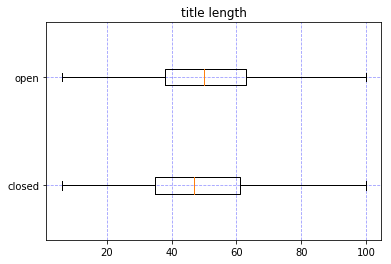

/home/ashita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


(78995, 2)


/home/ashita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(78465, 2)


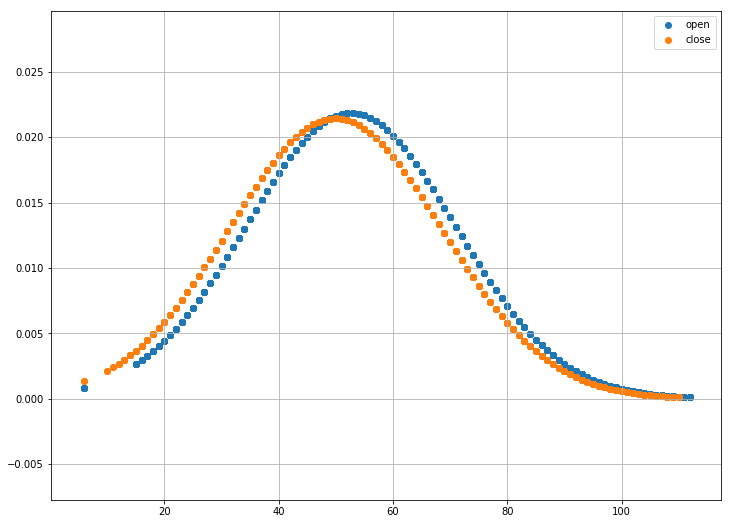

In [50]:

fig, ax = plt.subplots()
data = [closeData['titleLengthInChars'],openData['titleLengthInChars']]
ax.set_title('title length')
plt.boxplot(data, showfliers=False, labels=['closed', 'open'], vert=False)
plt.grid(True, linestyle='--', color='b', alpha=0.4)
plt.show()

def z_score(row):
    z = stats.zscore(row)
    return z


#z = np.abs(stats.zscore(closeData['titleLengthInChars']))
x_close = closeData[['titleLengthInChars']]
x_close['zscore'] = np.abs(stats.zscore(closeData['titleLengthInChars']))
#x_close.head()
x_close = x_close[(x_close.zscore<3)]
print(x_close.shape)

#plt.figure(figsize=(12,9))

data_c = x_close['titleLengthInChars']
std_c = np.std(data_c)
distribution_c = stats.norm.pdf(data_c, avg_title_len_c, std_c)
#plt.scatter(data_c, distribution)
#plt.legend()
#plt.grid(True)

#plt.show()


x_open = openData[['titleLengthInChars']]
x_open['zscore'] = np.abs(stats.zscore(x_open['titleLengthInChars']))
x_open.head()
x_open = x_open[(x_open.zscore<3)]
print(x_open.shape)



plt.figure(figsize=(12,9))

data_o = x_open['titleLengthInChars']
std_o = np.std(data_o)
distribution_o = stats.norm.pdf(data_o, avg_title_len_o, std_o)
plt.scatter(data_o, distribution_o, label='open')
plt.scatter(data_c, distribution_c, label='close')

plt.legend()
plt.grid(True)

plt.show()

### 10. # Interrogative Sentences


In [51]:
max_interro_o = np.max(openData['countOfInterrogativeSent'])
min_interro_o = np.min(openData['countOfInterrogativeSent'])
avg_interro_o = np.mean(openData['countOfInterrogativeSent'])
mode_interro_o = stat.mode(openData['countOfInterrogativeSent'])
median_interro_o = stat.median(openData['countOfInterrogativeSent'])

max_interro_c = np.max(closeData['countOfInterrogativeSent'])
min_interro_c = np.min(closeData['countOfInterrogativeSent'])
avg_interro_c = np.mean(closeData['countOfInterrogativeSent'])
mode_interro_c = stat.mode(closeData['countOfInterrogativeSent'])
median_interro_c = stat.median(closeData['countOfInterrogativeSent'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_interro_o) + '\t\t' + str(max_interro_c))
print('Minimum\t\t' + str(min_interro_o) + '\t\t' + str(min_interro_c))
print('Average\t\t' + str(avg_interro_o) + '\t' + str(avg_interro_c))
print('Mode\t\t' + str(mode_interro_o) + '\t\t' + str(mode_interro_c))
print('Median\t\t' + str(median_interro_o) + '\t\t' + str(median_interro_c))

Value		Open		Close
Maximum		464		115
Minimum		0		0
Average		1.1778673552938212	1.2125461254612546
Mode		1		1
Median		1		1


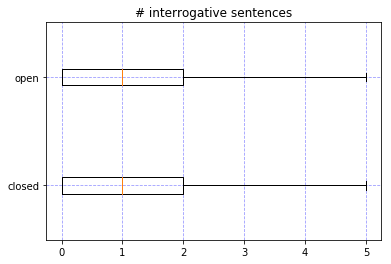

In [52]:
#plt.figure()

#plt.plot(openData['countOfInterrogativeSent'], label = 'open')
#plt.plot(closeData['countOfInterrogativeSent'], label = 'close')
#plt.xlabel('# of interrogative sentences')
#plt.legend()
#plt.grid(True)

#plt.show()    

fig2, ax2 = plt.subplots()
data = [closeData['countOfInterrogativeSent'],openData['countOfInterrogativeSent']]
ax2.set_title('# interrogative sentences')
ax2.boxplot(data, showfliers=False, labels=['closed', 'open'], vert=False)
plt.grid(True, linestyle='--', color='b', alpha=0.4)
plt.show()

### 11. # Short Words


In [53]:
max_shortwords_o = np.max(openData['shortWordCount'])
min_shortwords_o = np.min(openData['shortWordCount'])
avg_shortwords_o = np.mean(openData['shortWordCount'])
mode_shortwords_o = stat.mode(openData['shortWordCount'])
median_shortwords_o = stat.median(openData['shortWordCount'])

max_shortwords_c = np.max(closeData['shortWordCount'])
min_shortwords_c = np.min(closeData['shortWordCount'])
avg_shortwords_c = np.mean(closeData['shortWordCount'])
mode_shortwords_c = stat.mode(closeData['shortWordCount'])
median_shortwords_c = stat.median(closeData['shortWordCount'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_shortwords_o) + '\t\t' + str(max_shortwords_c))
print('Minimum\t\t' + str(min_shortwords_o) + '\t\t' + str(min_shortwords_c))
print('Average\t\t' + str(avg_shortwords_o) + '\t' + str(avg_shortwords_c))
print('Mode\t\t' + str(mode_shortwords_o) + '\t\t' + str(mode_shortwords_c))
print('Median\t\t' + str(median_shortwords_o) + '\t\t' + str(median_shortwords_c))

Value		Open		Close
Maximum		5319		3692
Minimum		1		0
Average		86.66532720287208	57.15970980048783
Mode		33		20
Median		59		39


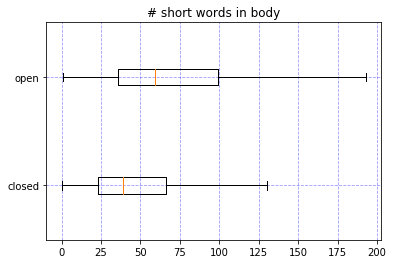

In [54]:
#plt.figure()

#plt.plot(openData['shortWordCount'], label = 'open')
#plt.plot(closeData['shortWordCount'], label = 'close')
#plt.xlabel('short word count')
#plt.legend()
#plt.grid(True)
#plt.show()

fig2, ax2 = plt.subplots()
data = [closeData['shortWordCount'],openData['shortWordCount']]
ax2.set_title('# short words in body')
ax2.boxplot(data, showfliers=False, labels=['closed', 'open'], vert=False)
plt.grid(True, linestyle='--', color='b', alpha=0.4)
plt.show()

9590
4290


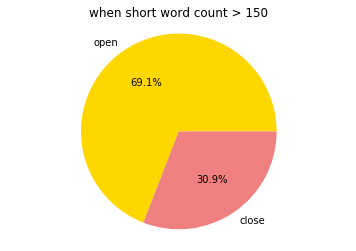

69795
75655


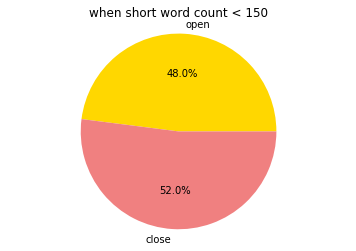

47159
30122


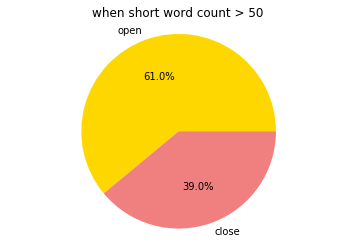

32226
49823


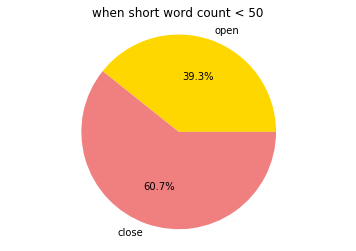

In [55]:
short_word_o_gt = openData[openData.shortWordCount >= 150]
print(short_word_o_gt.shape[0])

short_word_c_gt = closeData[closeData.shortWordCount >= 150]
print(short_word_c_gt.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [short_word_o_gt.shape[0], short_word_c_gt.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('when short word count > 150')
plt.axis('equal')
plt.show()

#---------------

short_word_o_lt = openData[openData.shortWordCount < 150]
print(short_word_o_lt.shape[0])

short_word_c_lt = closeData[closeData.shortWordCount < 150]
print(short_word_c_lt.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [short_word_o_lt.shape[0], short_word_c_lt.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('when short word count < 150')
plt.axis('equal')
plt.show()

#------------

short_word_o_gt50 = openData[openData.shortWordCount >= 50]
print(short_word_o_gt50.shape[0])

short_word_c_gt50 = closeData[closeData.shortWordCount >= 50]
print(short_word_c_gt50.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [short_word_o_gt50.shape[0], short_word_c_gt50.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('when short word count > 50')
plt.axis('equal')
plt.show()

#---------------

short_word_o_lt50 = openData[openData.shortWordCount < 50]
print(short_word_o_lt50.shape[0])

short_word_c_lt50 = closeData[closeData.shortWordCount < 50]
print(short_word_c_lt50.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [short_word_o_lt50.shape[0], short_word_c_lt50.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('when short word count < 50')
plt.axis('equal')
plt.show()

### 12. # Words in body


In [56]:
max_bodywords_o = np.max(openData['bodyWordCount'])
min_bodywords_o = np.min(openData['bodyWordCount'])
avg_bodywords_o = np.mean(openData['bodyWordCount'])
mode_bodywords_o = stat.mode(openData['bodyWordCount'])
median_bodywords_o = stat.median(openData['bodyWordCount'])

max_bodywords_c = np.max(closeData['bodyWordCount'])
min_bodywords_c = np.min(closeData['bodyWordCount'])
avg_bodywords_c = np.mean(closeData['bodyWordCount'])
mode_bodywords_c = stat.mode(closeData['bodyWordCount'])
median_bodywords_c = stat.median(closeData['bodyWordCount'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_bodywords_o) + '\t\t' + str(max_bodywords_c))
print('Minimum\t\t' + str(min_bodywords_o) + '\t\t' + str(min_bodywords_c))
print('Average\t\t' + str(avg_bodywords_o) + '\t' + str(avg_bodywords_c))
print('Mode\t\t' + str(mode_bodywords_o) + '\t\t' + str(mode_bodywords_c))
print('Median\t\t' + str(median_bodywords_o) + '\t\t' + str(median_bodywords_c))

Value		Open		Close
Maximum		4384		6588
Minimum		5		2
Average		175.12439377716194	114.48620926887234
Mode		92		51
Median		129		82


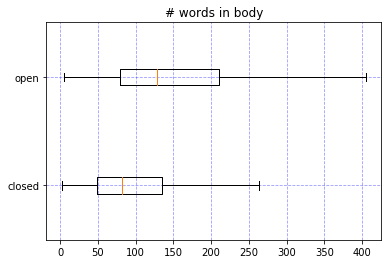

In [57]:
#plt.figure()

#plt.plot(openData['bodyWordCount'], label = 'open')
#plt.plot(closeData['bodyWordCount'], label = 'close')
#plt.xlabel('body word count')
#plt.legend()
#plt.grid(True)

#plt.show()


fig1, ax1 = plt.subplots()
data = [closeData['bodyWordCount'],openData['bodyWordCount']]
ax1.set_title('# words in body')
ax1.boxplot(data, showfliers=False, labels=['closed', 'open'], vert=False)
plt.grid(True, linestyle='--', color='b', alpha=0.4)
plt.show()

41333
22917


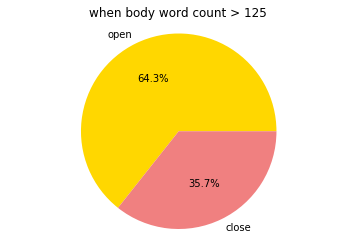

38052
57028


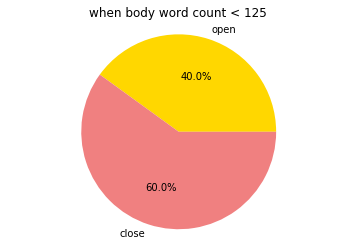

In [58]:
body_word_o_gt125 = openData[openData.bodyWordCount >= 125]
print(body_word_o_gt125.shape[0])

short_word_c_gt125 = closeData[closeData.bodyWordCount >= 125]
print(short_word_c_gt125.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [body_word_o_gt125.shape[0], short_word_c_gt125.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('when body word count > 125')
plt.axis('equal')
plt.show()

#---------------

body_word_o_lt125 = openData[openData.bodyWordCount < 125]
print(body_word_o_lt125.shape[0])

body_word_c_lt125 = closeData[closeData.bodyWordCount < 125]
print(body_word_c_lt125.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [body_word_o_lt125.shape[0], body_word_c_lt125.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('when body word count < 125')
plt.axis('equal')
plt.show()

### 13. # Punctuations

In [59]:
max_punct_o = np.max(openData['punctuationCount'])
min_punc_o = np.min(openData['punctuationCount'])
avg_punc_o = np.mean(openData['punctuationCount'])
mode_punc_o = stat.mode(openData['punctuationCount'])
median_punc_o = stat.median(openData['punctuationCount'])

max_punc_c = np.max(closeData['punctuationCount'])
min_punc_c = np.min(closeData['punctuationCount'])
avg_punc_c = np.mean(closeData['punctuationCount'])
mode_punc_c = stat.mode(closeData['punctuationCount'])
median_punc_c = stat.median(closeData['punctuationCount'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_punct_o) + '\t\t' + str(max_punc_c))
print('Minimum\t\t' + str(min_punc_o) + '\t\t' + str(min_punc_c))
print('Average\t\t' + str(avg_punc_o) + '\t' + str(avg_punc_c))
print('Mode\t\t' + str(mode_punc_o) + '\t\t' + str(mode_punc_c))
print('Median\t\t' + str(median_punc_o) + '\t\t' + str(median_punc_c))

Value		Open		Close
Maximum		3343		7475
Minimum		0		0
Average		15.959715311456824	70.78335105384951
Mode		6		5
Median		11		21


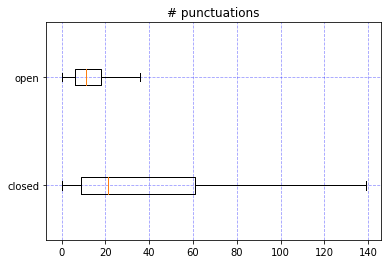

In [60]:
#plt.figure()
#plt.plot(openData['punctuationCount'], label = 'open')
#plt.plot(closeData['punctuationCount'], label = 'close')
#plt.xlabel('punctuation count')
#plt.legend()
#plt.grid(True)
#plt.show()
 
#plt.figure()    
#plt.hist(closeData['punctuationCount'], bins=100, rwidth=0.5)
#plt.boxplot(closeData['punctuationCount'], showfliers=False, labels=['closed'], vert=False)
#plt.grid(True)
#plt.show()

#plt.figure()
#plt.hist(openData['punctuationCount'])
#plt.boxplot(openData['punctuationCount'], showfliers=False, labels=['open'], vert=False)
#plt.grid(True)
#plt.show()

fig, ax = plt.subplots()
data = [closeData['punctuationCount'],openData['punctuationCount']]
ax.set_title('# punctuations')
plt.boxplot(data, showfliers=False, labels=['closed', 'open'], vert=False)
plt.grid(True, linestyle='--', color='b', alpha=0.4)
plt.show()



#plt.figure(figsize=(16,12))    
#std_c = np.std(closeData['punctuationCount'])
#distribution = stats.norm.pdf(closeData['punctuationCount'], avg_punc_c, std_c)
#plt.plot(distribution, closeData['punctuationCount'])
#plt.show()

7848
33211


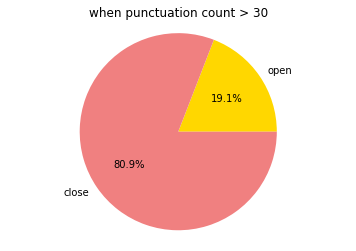

71537
46734


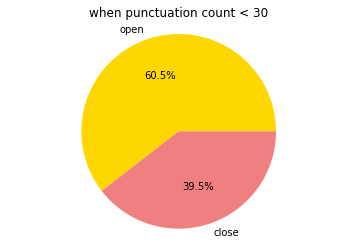

In [61]:
punc_count_o_gt = openData[openData.punctuationCount >= 30]
print(punc_count_o_gt.shape[0])

punc_count_c_gt = closeData[closeData.punctuationCount >= 30]
print(punc_count_c_gt.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [punc_count_o_gt.shape[0], punc_count_c_gt.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('when punctuation count > 30')
plt.axis('equal')
plt.show()

#---------------

punc_count_o_lt = openData[openData.punctuationCount < 30]
print(punc_count_o_lt.shape[0])

punc_count_c_lt = closeData[closeData.punctuationCount < 30]
print(punc_count_c_lt.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [punc_count_o_lt.shape[0], punc_count_c_lt.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('when punctuation count < 30')
plt.axis('equal')
plt.show()

### short word count and body word count

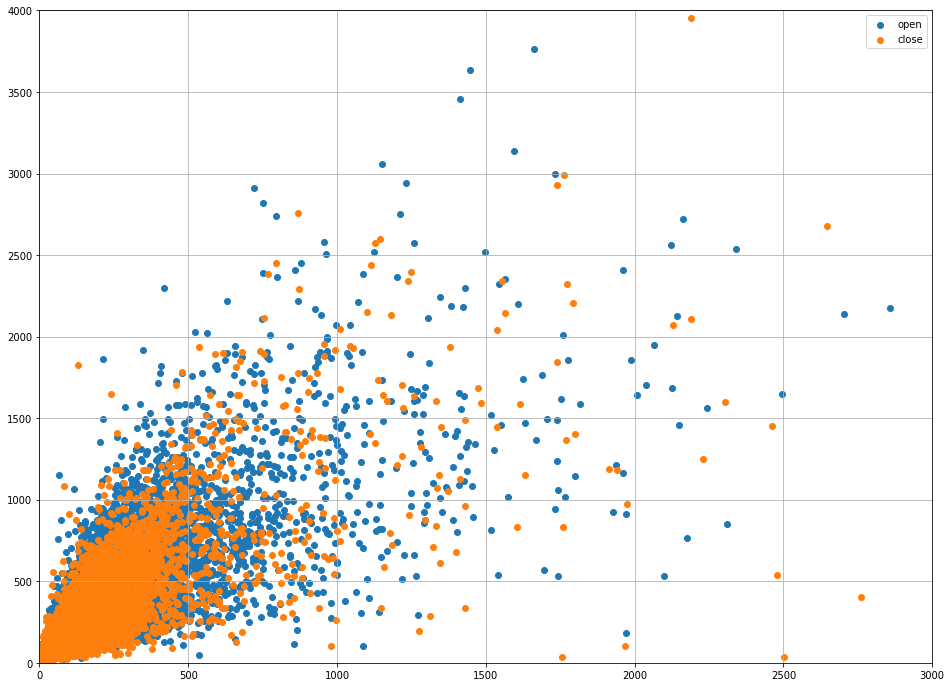

In [62]:
plt.figure(figsize=(16,12))

plt.scatter(openData['shortWordCount'], openData['bodyWordCount'], label='open')
plt.scatter(closeData['shortWordCount'], closeData['bodyWordCount'], label='close')

plt.xlim(0,3000)
plt.ylim(0,4000)
plt.grid(True)
plt.legend()
plt.show()

### UpVotes and DownVotes

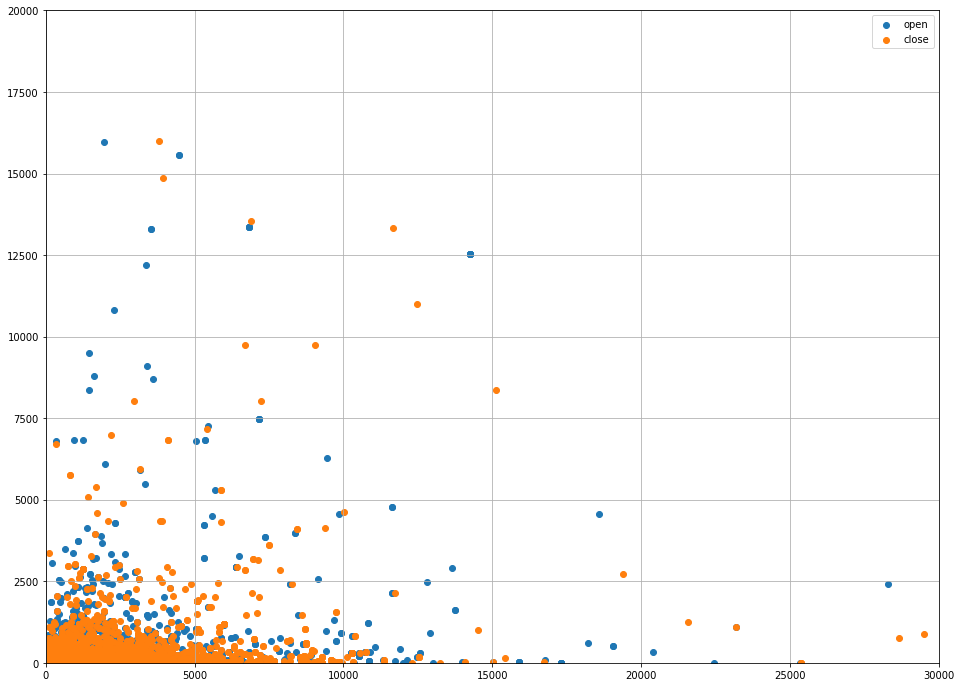

In [63]:
plt.figure(figsize=(16,12))

plt.scatter(openData['Upvotes'], openData['Downvotes'], label='open')
plt.scatter(closeData['Upvotes'], closeData['Downvotes'], label='close')

plt.xlim(0,30000)
plt.ylim(0,20000)
plt.grid(True)
plt.legend()
plt.show()

### gunning fog index

In [27]:
pattern = re.compile('<.*?>')
def remove_tags(row):
    row = re.sub(pattern, '', row)
    return row

code = re.compile('<pre><code>[\s\S]*?<\/code><\/pre>')
def remove_code(row):
    row = re.sub(code, '', row)
    return row

def remove_inline_code(row):
    row = re.sub('<code>[\s\S]*?<\/code>', ' ', row)
    return row

def remove_para_change(row):
    row = re.sub('\n\n', ' ', row)
    return row

In [ ]:
file_o = openData[['Body']]
file_c = closeData[['Body']]


file_o['Body'] = file_o['Body'].apply(remove_code)
file_o['Body'] = file_o['Body'].apply(remove_inline_code)
file_o['Body'] = file_o['Body'].apply(remove_tags)
file_o['Body'] = file_o['Body'].apply(remove_para_change)

#print(type(file_o))

file_c['Body'] = file_c['Body'].apply(remove_code)
file_c['Body'] = file_c['Body'].apply(remove_inline_code)
file_c['Body'] = file_c['Body'].apply(remove_tags)
file_c['Body'] = file_c['Body'].apply(remove_para_change)


In [ ]:
def calculate_gfi(row):
    gfi = ts.gunning_fog(row)
    return gfi

In [10]:
#file_o['gfi'] = ''
#file_o['gfi'] = file_o['Body'].apply(calculate_gfi)

#file_c['gfi'] = ''
#file_c['gfi'] = file_c['Body'].apply(calculate_gfi)

In [11]:
#fig, ax = plt.subplots()
#data = [file_o['gfi'], file_c['gfi']]
#ax.set_title('gfi')
#plt.boxplot(data, showfliers=False, labels=['open', 'closed'], vert=False)
#plt.grid(True, linestyle='--', color='b', alpha=0.4)
#plt.show()